In [34]:
import os
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.progress import track
from rich.theme import Theme
from rich.style import Style
from rich import box
import seaborn as sns
from collections import defaultdict

# Initialize Rich console with Dracula theme
dracula_theme = Theme(
    {
        "info": "bold #8be9fd",  # Cyan
        "warning": "bold #f1fa8c",  # Yellow
        "error": "bold #ff5555",  # Red
        "success": "bold #50fa7b",  # Green
        "attacker": "bold #ff79c6",  # Pink
        "defender": "bold #bd93f9",  # Purple
        "header": "bold #f8f8f2 on #44475a",  # Foreground on Current Line
        "setup": "bold #f8f8f2 on #6272a4",  # Foreground on Comment
        "value_high": "bold #50fa7b",  # Green
        "value_medium": "bold #f1fa8c",  # Yellow
        "value_low": "bold #ff5555",  # Red
        "title": "bold #f8f8f2 on #6272a4",  # Foreground on Comment
    }
)

console = Console(theme=dracula_theme)

In [35]:
def extract_hash_key(filename):
    """Extract hash key from log filename."""
    match = re.search(r'log_([a-f0-9]+)_attacker_(.+)_defender_(.+)', filename)
    if match:
        hash_key = match.group(1)
        attacker = match.group(2)
        defender = match.group(3)
        return hash_key, attacker, defender
    return None, None, None

def group_files_by_hash(data_path):
    """Group files by their hash keys."""
    hash_groups = defaultdict(list)
    attacker_strategies = set()
    defender_strategies = set()
    
    # Check if directory exists
    if not os.path.exists(data_path):
        console.print(Panel(f"Directory {data_path} does not exist.", title="Error", style="error"))
        return hash_groups, attacker_strategies, defender_strategies
    
    # Get all JSON files
    json_files = [f for f in os.listdir(data_path) if f.endswith(".json") and f.startswith("log_")]
    console.print(Panel(f"Found {len(json_files)} log files.", title="File Detection", style="info"))
    
    # Group files by hash key
    for filename in track(json_files, description="[info]Grouping files by hash key[/info]"):
        hash_key, attacker, defender = extract_hash_key(filename)
        if hash_key:
            hash_groups[hash_key].append((filename, attacker, defender))
            attacker_strategies.add(attacker)
            defender_strategies.add(defender)
    
    return hash_groups, attacker_strategies, defender_strategies

In [36]:
# Set the path to your data directory
DATA_PATH = os.path.join("data", "result_v1.1.1")  # Update this path as needed

# Group files by hash key
hash_groups, attacker_strategies, defender_strategies = group_files_by_hash(DATA_PATH)

# Display hash keys and file counts
hash_table = Table(title="[title]Unique Hash Keys[/title]", box=box.ROUNDED)
hash_table.add_column("Hash Key", style="info")
hash_table.add_column("Files", justify="right", style="success")
hash_table.add_column("Attacker Strategies", style="attacker")
hash_table.add_column("Defender Strategies", style="defender")

full_rows = []
for hash_key, files in sorted(hash_groups.items(), key=lambda x: len(x[1]), reverse=True):
    # Get unique attacker and defender strategies for this hash key
    attackers = sorted(set(attacker for _, attacker, _ in files))
    defenders = sorted(set(defender for _, _, defender in files))
    
    # Add row to the full table
    row = (
        hash_key, 
        str(len(files)), 
        ", ".join(attackers), 
        ", ".join(defenders)
    )
    hash_table.add_row(*row)
    full_rows.append(row)

# Create a new table for display only (the original hash_table remains intact)
display_table = Table(title=hash_table.title, box=hash_table.box)
# Copy over the same columns
display_table.add_column("Hash Key", style="info")
display_table.add_column("Files", justify="right", style="success")
display_table.add_column("Attacker Strategies", style="attacker")
display_table.add_column("Defender Strategies", style="defender")

# Only add the first 10 rows (or any subset you choose)
for row in full_rows[:10]:
    display_table.add_row(*row)

# Now print the partial display table
console.print(display_table)

# Print summary in a panel
summary_text = f"""
Total unique hash keys: {len(hash_groups)}
Total unique attacker strategies: {len(attacker_strategies)}
Total unique defender strategies: {len(defender_strategies)}
Total log files analyzed: {sum(len(files) for files in hash_groups.values())}
"""

console.print(Panel(summary_text, title="[title]Analysis Summary[/title]", style="setup"))

╭──────────────────────────────────────────────── File Detection ─────────────────────────────────────────────────╮
│ Found 6400 log files.                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

                                                 Unique Hash Keys                                                  
╭────────────┬───────┬─────────────────────────────────────────────┬──────────────────────────────────────────────╮
│ Hash Key   │ Files │ Attacker Strategies                         │ Defender Strategies                          │
├────────────┼───────┼─────────────────────────────────────────────┼──────────────────────────────────────────────┤
│ 8a1c44a665 │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ 058542a32c │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ 26842f9e85 │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ cee988ac06 │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ 23d7d5c7cc │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ 9d877048cc │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ aafcdfcf58 │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ fcfb67985b │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ aa34d4da24 │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
│ 9b2a44fb1a │    16 │ Example_Attacker, GMU_Attacker,             │ Example_Defender.json, GMU_Defender.json,    │
│            │       │ MSU_Attacker, UNCC_Attacker                 │ MSU_Defender.json, UNCC_Defender.json        │
╰────────────┴───────┴─────────────────────────────────────────────┴──────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Analysis Summary ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Total unique hash keys: 400                                                                                     │
│ Total unique attacker strategies: 4                                                                             │
│ Total unique defender strategies: 4                                                                             │
│ Total log files analyzed: 6400                                                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [37]:
def extract_summary_from_file(filepath):
    """Extract summary data from a JSON file."""
    try:
        if os.path.getsize(filepath) == 0:
            return None
        
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        # Find summary record
        for record in data.get('records', []):
            if record.get('summary', False):
                return {
                    'payoff': record.get('payoff', 0),
                    'time': record.get('time', 0),
                    'total_captures': record.get('total_captures', 0),
                    'total_tags': record.get('total_tags', 0)
                }
        return None
    except Exception as e:
        console.print(f"[error]Error reading {filepath}: {str(e)}[/error]")
        return None

def extract_metadata_from_file(filepath):
    """Extract metadata from a JSON file."""
    try:
        if os.path.getsize(filepath) == 0:
            return None
        
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        return data.get('metadata', {})
    except Exception as e:
        console.print(f"[error]Error reading metadata from {filepath}: {str(e)}[/error]")
        return None

def compute_payoff_matrix_for_hash(hash_key, files, data_path):
    """Compute payoff matrix for a specific hash key."""
    # Collect attacker and defender strategies for this hash key
    attacker_strategies = set()
    defender_strategies = set()
    summary_data = []
    metadata = None
    
    for filename, attacker, defender in files:
        filepath = os.path.join(data_path, filename)
        
        # Extract summary data
        summary = extract_summary_from_file(filepath)
        if summary:
            summary['attacker'] = attacker
            summary['defender'] = defender
            summary_data.append(summary)
            attacker_strategies.add(attacker)
            defender_strategies.add(defender)
        
        # Extract metadata (we only need one copy since it should be the same for all files with the same hash)
        if metadata is None:
            metadata = extract_metadata_from_file(filepath)
    
    # Skip if no data
    if not summary_data:
        return None, None
    
    # Create dataframe from summary data
    df = pd.DataFrame(summary_data)
    
    # Create payoff matrix
    payoff_matrix = pd.pivot_table(
        df, 
        values='payoff', 
        index='defender', 
        columns='attacker', 
        aggfunc='mean'
    )
    
    # Create captures matrix
    captures_matrix = pd.pivot_table(
        df, 
        values='total_captures', 
        index='defender', 
        columns='attacker', 
        aggfunc='mean'
    )
    
    # Create tags matrix
    tags_matrix = pd.pivot_table(
        df, 
        values='total_tags', 
        index='defender', 
        columns='attacker', 
        aggfunc='mean'
    )
    
    # Create time matrix
    time_matrix = pd.pivot_table(
        df, 
        values='time', 
        index='defender', 
        columns='attacker', 
        aggfunc='mean'
    )
    
    result = {
        'hash_key': hash_key,
        'metadata': metadata,
        'payoff_matrix': payoff_matrix,
        'captures_matrix': captures_matrix,
        'tags_matrix': tags_matrix,
        'time_matrix': time_matrix,
        'file_count': len(files),
        'attacker_strategies': sorted(list(attacker_strategies)),
        'defender_strategies': sorted(list(defender_strategies))
    }
    
    return result, df

In [38]:
# Compute payoff matrices for each hash key
hash_results = {}
all_summary_data = []

console.print(Panel("[info]Computing payoff matrices for each unique hash key...[/info]", 
                    title="[title]Matrix Computation[/title]", style="setup"))

for hash_key, files in track(hash_groups.items(), description="[info]Computing payoff matrices[/info]"):
    result, df = compute_payoff_matrix_for_hash(hash_key, files, DATA_PATH)
    if result:
        hash_results[hash_key] = result
        if df is not None:
            df['hash_key'] = hash_key
            all_summary_data.append(df)

# Combine all summary data
if all_summary_data:
    all_data = pd.concat(all_summary_data)
    console.print(Panel(f"Successfully processed {len(hash_results)} hash keys.", 
                        title="[title]Processing Complete[/title]", style="success"))

    # Display matrix statistics
    total_payoff_matrices = len(hash_results)
    complete_matrices = sum(1 for r in hash_results.values() 
                         if not r['payoff_matrix'].isna().any().any())
    
    matrix_stats = f"""
    Total unique payoff matrices: {total_payoff_matrices}
    Complete matrices (no missing values): {complete_matrices}
    Incomplete matrices: {total_payoff_matrices - complete_matrices}
    Total data points across all matrices: {sum(r['file_count'] for r in hash_results.values())}
    """
    
    console.print(Panel(matrix_stats, title="[title]Matrix Statistics[/title]", style="info"))
else:
    all_data = pd.DataFrame()
    console.print(Panel("No data was processed.", title="Warning", style="warning"))

╭────────────────────────────────────────────── Matrix Computation ───────────────────────────────────────────────╮
│ Computing payoff matrices for each unique hash key...                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────── Processing Complete ──────────────────────────────────────────────╮
│ Successfully processed 400 hash keys.                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Matrix Statistics ───────────────────────────────────────────────╮
│                                                                                                                 │
│     Total unique payoff matrices: 400                                                                           │
│     Complete matrices (no missing values): 400                                                                  │
│     Incomplete matrices: 0                                                                                      │
│     Total data points across all matrices: 6400                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [39]:
def display_hash_result(hash_key, result):
    """Display detailed results for a specific hash key with setup information."""
    console.rule(f"[header]Hash Key: {hash_key}[/header]")

    # Display metadata
    metadata = result["metadata"]
    if metadata:
        metadata_table = Table(title="[title]Game Configuration (Setup)[/title]", box=box.SIMPLE_HEAVY)
        metadata_table.add_column("Parameter", style="info")
        metadata_table.add_column("Value", style="success")

        # First display setup keys (everything but strategies)
        for key, value in sorted(metadata.items()):
            if key not in ["attacker_strategy", "defender_strategy"]:
                # Format complex values
                if isinstance(value, list):
                    value_str = str(value)
                else:
                    value_str = str(value)
                metadata_table.add_row(str(key), value_str)

        console.print(metadata_table)

    # Display strategies tested with this setup
    strat_table = Table(title="[title]Strategies Tested[/title]", box=box.SIMPLE_HEAVY)
    strat_table.add_column("Attacker Strategies", style="attacker")
    strat_table.add_column("Defender Strategies", style="defender")

    # Prepare rows for strategy display
    attackers = result.get("attacker_strategies", [])
    defenders = result.get("defender_strategies", [])
    max_rows = max(len(attackers), len(defenders))

    for i in range(max_rows):
        att = attackers[i] if i < len(attackers) else ""
        def_ = defenders[i] if i < len(defenders) else ""
        strat_table.add_row(att, def_)

    console.print(strat_table)

    # Display payoff matrix
    console.print("[title]Payoff Matrix[/title]")

    payoff_matrix = result["payoff_matrix"]

    # Convert pandas DataFrame to rich Table
    matrix_table = Table(box=box.SIMPLE)

    # Add header row
    matrix_table.add_column("Defender\\Attacker", style="header")
    for col in payoff_matrix.columns:
        matrix_table.add_column(col, style="attacker")

    # Add data rows
    for idx, row in payoff_matrix.iterrows():
        row_data = [idx]  # Add defender name as first column

        for val in row:
            # Color cells based on value
            if pd.isna(val):
                cell_val = "-"
                cell_style = "dim"
            else:
                cell_val = f"{val:.2f}"
                if val > 0.7:
                    cell_style = "value_high"
                elif val > 0.3:
                    cell_style = "value_medium"
                else:
                    cell_style = "value_low"
                row_data.append(f"[{cell_style}]{cell_val}[/{cell_style}]")

        matrix_table.add_row(*row_data)

    console.print(matrix_table)

    # Print number of files
    console.print(f"[bold]Based on {result['file_count']} simulation files[/bold]")

def analyze_identical_matrices():
    """Analyze matrices with identical entries and display samples."""
    same_payoff_matrices = 0
    same_payoff_diff_time = 0
    same_both = 0
    same_payoff_diff_time_keys = []

    for hash_key, result in hash_results.items():
        payoff_matrix = result['payoff_matrix']
        time_matrix = result.get('time_matrix')
        
        # Skip empty matrices
        if payoff_matrix.empty:
            continue
        
        # Check if all cells have exactly the same value
        payoff_vals = payoff_matrix.values.flatten()
        payoff_vals = payoff_vals[~np.isnan(payoff_vals)]
        
        if len(payoff_vals) > 0 and np.all(payoff_vals == payoff_vals[0]):
            same_payoff_matrices += 1
            
            # Check time matrix if available
            if time_matrix is not None and not time_matrix.empty:
                time_vals = time_matrix.values.flatten()
                time_vals = time_vals[~np.isnan(time_vals)]
                
                if len(time_vals) > 0 and np.all(time_vals == time_vals[0]):
                    same_both += 1
                else:
                    same_payoff_diff_time += 1
                    same_payoff_diff_time_keys.append(hash_key)
    
    # Display summary statistics
    console.print(Panel(
        f"Matrices with identical payoff entries: {same_payoff_matrices} out of {len(hash_results)}\n"
        f"Matrices with same payoff but different time: {same_payoff_diff_time}\n"
        f"Matrices with same payoff and same time: {same_both}",
        title="[title]Matrix Identity Analysis[/title]",
        style="info"
    ))

    # Display samples with same payoff but different time
    sample_size = min(5, len(same_payoff_diff_time_keys))
    if sample_size > 0:
        console.print(Panel(
            f"Displaying {sample_size} samples with identical payoff but different time values.", 
            title="[title]Same Payoff, Different Time Samples[/title]",
            style="info"
        ))

        for i, hash_key in enumerate(same_payoff_diff_time_keys[:sample_size]):
            result = hash_results[hash_key]
            console.rule(f"[header]Sample {i+1}: Hash Key {hash_key}[/header]")
            
            # Display metadata
            metadata = result['metadata']
            if metadata:
                console.print(f"[setup]{', '.join([f'{k}={v}' for k, v in metadata.items() if k not in ['attacker_strategy', 'defender_strategy']])}[/setup]")
            
            # Display payoff matrix value
            payoff_matrix = result['payoff_matrix']
            console.print("[title]Payoff Matrix (All Same Values)[/title]")
            console.print(f"All values = {payoff_matrix.iloc[0, 0]:.4f}")
            
            # Display time matrix
            # time_matrix = result['time_matrix']
            # console.print("[title]Time Matrix (Different Values)[/title]")
            
            # Create time matrix table
            # time_table = Table(box=box.SIMPLE)
            # time_table.add_column("Defender\\Attacker", style="header")
            
            # for col in time_matrix.columns:
            #     time_table.add_column(col, style="attacker")
            
            # for idx, row in time_matrix.iterrows():
            #     row_data = [idx]
            #     for val in row:
            #         if pd.isna(val):
            #             row_data.append("-")
            #         else:
            #             row_data.append(f"{val:.2f}")
            #     time_table.add_row(*row_data)
            
            # console.print(time_table)
            # console.print("")

    return same_payoff_diff_time_keys

# Run the analysis
same_payoff_diff_time_keys = analyze_identical_matrices()

for i, (hash_key, result) in enumerate(list(hash_results.items())[100 : 100 + 5]):
    display_hash_result(hash_key, result)

╭─────────────────────────────────────────── Matrix Identity Analysis ────────────────────────────────────────────╮
│ Matrices with identical payoff entries: 99 out of 400                                                           │
│ Matrices with same payoff but different time: 54                                                                │
│ Matrices with same payoff and same time: 45                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Same Payoff, Different Time Samples ──────────────────────────────────────╮
│ Displaying 5 samples with identical payoff but different time values.                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────── Sample 1: Hash Key 53dac21d28 ──────────────────────────────────────────

graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=1, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=1, defender_dist_type=normal, defender_param=[4, 2]

Payoff Matrix (All Same Values)

All values = -0.5000

────────────────────────────────────────── Sample 2: Hash Key 752fd01233 ──────────────────────────────────────────

graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=1, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=1, defender_dist_type=normal, defender_param=[4, 2]

Payoff Matrix (All Same Values)

All values = -0.5000

────────────────────────────────────────── Sample 3: Hash Key ae8ea1f35b ──────────────────────────────────────────

graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=10, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=10, defender_dist_type=normal, defender_param=[4, 2]

Payoff Matrix (All Same Values)

All values = -3.5000

────────────────────────────────────────── Sample 4: Hash Key 9f928e5fbd ──────────────────────────────────────────

graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=5, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=5, defender_dist_type=normal, defender_param=[4, 2]

Payoff Matrix (All Same Values)

All values = -1.0000

────────────────────────────────────────── Sample 5: Hash Key f52048f919 ──────────────────────────────────────────

graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=5, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=5, defender_dist_type=normal, defender_param=[4, 2]

Payoff Matrix (All Same Values)

All values = -1.0000

────────────────────────────────────────────── Hash Key: 85b29cce86 ───────────────────────────────────────────────

        Game Configuration (Setup)        
                                          
  Parameter            Value              
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  attacker_dist_type   normal             
  attacker_num         2                  
  attacker_param       [7, 3]             
  defender_dist_type   normal             
  defender_num         2                  
  defender_param       [4, 2]             
  flag_dist_type       uniform            
  flag_num             1                  
  flag_param           2                  
  graph_file           graph_200_200.pkl 

               Strategies Tested               
                                               
  Attacker Strategies   Defender Strategies    
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Example_Attacker      Example_Defender.json  
  GMU_Attacker          GMU_Defender.json      
  MSU_Attacker          MSU_Defender.json      
  UNCC_Attacker         UNCC_Defender.json    

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   0.50               0.50           0.50           0.50           
  GMU_Defender.json       0.50               0.50           0.50           0.50           
  MSU_Defender.json       0.50               2.00           0.50           0.50           
  UNCC_Defender.json      0.50               0.50           0.50           0.50          

Based on 16 simulation files

────────────────────────────────────────────── Hash Key: bc4d975c98 ───────────────────────────────────────────────

        Game Configuration (Setup)        
                                          
  Parameter            Value              
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  attacker_dist_type   normal             
  attacker_num         5                  
  attacker_param       [7, 3]             
  defender_dist_type   normal             
  defender_num         5                  
  defender_param       [4, 2]             
  flag_dist_type       uniform            
  flag_num             3                  
  flag_param           2                  
  graph_file           graph_200_200.pkl 

               Strategies Tested               
                                               
  Attacker Strategies   Defender Strategies    
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Example_Attacker      Example_Defender.json  
  GMU_Attacker          GMU_Defender.json      
  MSU_Attacker          MSU_Defender.json      
  UNCC_Attacker         UNCC_Defender.json    

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   0.50               0.50           0.50           0.50           
  GMU_Defender.json       0.50               0.50           0.50           0.50           
  MSU_Defender.json       0.50               0.50           0.50           0.50           
  UNCC_Defender.json      0.50               0.50           0.50           0.50          

Based on 16 simulation files

────────────────────────────────────────────── Hash Key: d9cb0a9dc2 ───────────────────────────────────────────────

        Game Configuration (Setup)        
                                          
  Parameter            Value              
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  attacker_dist_type   normal             
  attacker_num         1                  
  attacker_param       [7, 3]             
  defender_dist_type   normal             
  defender_num         1                  
  defender_param       [4, 2]             
  flag_dist_type       uniform            
  flag_num             1                  
  flag_param           2                  
  graph_file           graph_200_200.pkl 

               Strategies Tested               
                                               
  Attacker Strategies   Defender Strategies    
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Example_Attacker      Example_Defender.json  
  GMU_Attacker          GMU_Defender.json      
  MSU_Attacker          MSU_Defender.json      
  UNCC_Attacker         UNCC_Defender.json    

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   -0.50              -0.50          -0.50          -0.50          
  GMU_Defender.json       -0.50              -0.50          -0.50          -0.50          
  MSU_Defender.json       -0.50              -0.50          -0.50          -0.50          
  UNCC_Defender.json      -0.50              -0.50          -0.50          -0.50         

Based on 16 simulation files

────────────────────────────────────────────── Hash Key: 6b36c41fab ───────────────────────────────────────────────

        Game Configuration (Setup)        
                                          
  Parameter            Value              
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  attacker_dist_type   normal             
  attacker_num         2                  
  attacker_param       [7, 3]             
  defender_dist_type   normal             
  defender_num         2                  
  defender_param       [4, 2]             
  flag_dist_type       uniform            
  flag_num             1                  
  flag_param           2                  
  graph_file           graph_200_200.pkl 

               Strategies Tested               
                                               
  Attacker Strategies   Defender Strategies    
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Example_Attacker      Example_Defender.json  
  GMU_Attacker          GMU_Defender.json      
  MSU_Attacker          MSU_Defender.json      
  UNCC_Attacker         UNCC_Defender.json    

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   0.50               0.50           0.50           0.50           
  GMU_Defender.json       0.50               0.50           0.50           0.50           
  MSU_Defender.json       0.50               0.50           0.50           0.50           
  UNCC_Defender.json      0.50               0.50           0.50           0.50          

Based on 16 simulation files

────────────────────────────────────────────── Hash Key: 2c27fc5f11 ───────────────────────────────────────────────

        Game Configuration (Setup)        
                                          
  Parameter            Value              
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  attacker_dist_type   normal             
  attacker_num         10                 
  attacker_param       [7, 3]             
  defender_dist_type   normal             
  defender_num         10                 
  defender_param       [4, 2]             
  flag_dist_type       uniform            
  flag_num             5                  
  flag_param           2                  
  graph_file           graph_200_200.pkl 

               Strategies Tested               
                                               
  Attacker Strategies   Defender Strategies    
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Example_Attacker      Example_Defender.json  
  GMU_Attacker          GMU_Defender.json      
  MSU_Attacker          MSU_Defender.json      
  UNCC_Attacker         UNCC_Defender.json    

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   -3.50              -3.50          -3.50          -3.50          
  GMU_Defender.json       -3.50              -3.50          -3.50          -3.50          
  MSU_Defender.json       -3.50              -3.50          -3.50          -3.50          
  UNCC_Defender.json      -3.50              -3.50          -3.50          -3.50         

Based on 16 simulation files

In [41]:
def compute_nash_per_matrix(hash_results):
    """Compute Nash equilibria for each hash key without summing scores."""
    try:
        import nashpy as nash
        import warnings
        
        # Suppress all nashpy warnings
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        warnings.filterwarnings("ignore", module="nashpy")
        
        matrix_strategy_scores = {}
        
        console.print(Panel("[info]Computing Nash equilibria for each payoff matrix...[/info]", 
                          title="[title]Nash Equilibrium Analysis[/title]", style="setup"))
        
        with console.status("[info]Computing Nash equilibria[/info]") as status:
            for hash_key, result in hash_results.items():
                payoff_matrix = result['payoff_matrix']
                
                # Skip empty matrices
                if payoff_matrix.empty or payoff_matrix.isna().all().all():
                    continue
                    
                try:
                    # Fill NaN values with 0 and convert to numpy array
                    A = payoff_matrix.fillna(0).astype(float).values
                    
                    # Create game
                    game = nash.Game(-A, A)
                    
                    # Compute equilibria
                    equilibria = list(game.support_enumeration())
                    
                    if not equilibria:
                        continue
                    
                    # Initialize strategy scores for this matrix
                    matrix_scores = {
                        'attacker': {col: 0.0 for col in payoff_matrix.columns},
                        'defender': {row: 0.0 for row in payoff_matrix.index},
                        'equilibria': equilibria,
                        'is_pure': False
                    }
                    
                    # Check if we have pure Nash equilibria
                    pure_equilibria = []
                    
                    for row_eq, col_eq in equilibria:
                        if (np.isclose(row_eq, 0) | np.isclose(row_eq, 1)).all() and \
                           (np.isclose(col_eq, 0) | np.isclose(col_eq, 1)).all():
                            pure_equilibria.append((row_eq, col_eq))
                    
                    # Assign scores based on equilibria
                    if pure_equilibria:
                        # For pure equilibria, assign score of 1.0 to optimal strategies
                        matrix_scores['is_pure'] = True
                        
                        for row_eq, col_eq in pure_equilibria:
                            # Defender scores (rows)
                            for idx, prob in enumerate(row_eq):
                                if np.isclose(prob, 1.0):
                                    strategy = payoff_matrix.index[idx]
                                    matrix_scores['defender'][strategy] = 1.0
                                    
                            # Attacker scores (columns)
                            for idx, prob in enumerate(col_eq):
                                if np.isclose(prob, 1.0):
                                    strategy = payoff_matrix.columns[idx]
                                    matrix_scores['attacker'][strategy] = 1.0
                    else:
                        # For mixed equilibria, assign score based on average probability
                        row_vecs = np.array([eq[0] for eq in equilibria])
                        col_vecs = np.array([eq[1] for eq in equilibria])
                        
                        avg_row = np.mean(row_vecs, axis=0)
                        avg_col = np.mean(col_vecs, axis=0)
                        
                        # Defender scores (rows)
                        for idx, prob in enumerate(avg_row):
                            strategy = payoff_matrix.index[idx]
                            matrix_scores['defender'][strategy] = prob
                                
                        # Attacker scores (columns)
                        for idx, prob in enumerate(avg_col):
                            strategy = payoff_matrix.columns[idx]
                            matrix_scores['attacker'][strategy] = prob
                    
                    # Store the results for this matrix
                    matrix_strategy_scores[hash_key] = matrix_scores
                    
                except Exception as e:
                    console.print(f"[error]Error computing Nash for hash key {hash_key}: {str(e)}[/error]")
        
        console.print(f"[success]Successfully computed Nash equilibria for {len(matrix_strategy_scores)} matrices.[/success]")
        
        return matrix_strategy_scores
        
    except ImportError:
        console.print("[warning]Nashpy package not installed. Skipping Nash equilibrium analysis.[/warning]")
        console.print("[warning]Install with: pip install nashpy[/warning]")
        return {}

# Compute Nash equilibria without summing
matrix_nash_results = compute_nash_per_matrix(hash_results)

# Display sample of individual matrix results
def display_sample_matrix_results(matrix_nash_results, hash_results, sample_size=5, offset=173):
    """Display Nash equilibrium results with payoff matrices for a sample of matrices."""
    sample_keys = list(matrix_nash_results.keys())[offset:offset+sample_size]
    
    console.rule("[header]Sample Matrix Nash Equilibrium Results[/header]")
    
    for hash_key in sample_keys:
        nash_result = matrix_nash_results[hash_key]
        result_data = hash_results[hash_key]
        metadata = result_data['metadata']
        payoff_matrix = result_data['payoff_matrix']
        
        # Display hash key and setup info
        console.print(f"[bold cyan]Hash Key: {hash_key}[/bold cyan]")
        
        # Display compact setup info
        setup_info = ", ".join([f"{k}={v}" for k, v in metadata.items() 
                               if k not in ['attacker_strategy', 'defender_strategy']])
        console.print(f"[setup]Setup: {setup_info}[/setup]")
        
        # Display equilibrium type
        eq_type = "Pure Nash" if nash_result['is_pure'] else "Mixed Nash"
        console.print(f"[info]Equilibrium Type: {eq_type}[/info]")
        
        # Display payoff matrix
        console.print("[title]Payoff Matrix[/title]")
        
        # Convert pandas DataFrame to rich Table
        matrix_table = Table(box=box.SIMPLE)
        
        # Add header row
        matrix_table.add_column("Defender\\Attacker", style="header")
        for col in payoff_matrix.columns:
            matrix_table.add_column(col, style="attacker")
        
        # Add data rows
        for idx, row in payoff_matrix.iterrows():
            row_data = [idx]  # Add defender name as first column
            
            for val in row:
                # Color cells based on value
                if pd.isna(val):
                    cell_val = "-"
                    cell_style = "dim"
                else:
                    cell_val = f"{val:.2f}"
                    if val > 0.7:
                        cell_style = "value_high"
                    elif val > 0.3:
                        cell_style = "value_medium"
                    else:
                        cell_style = "value_low"
                    row_data.append(f"[{cell_style}]{cell_val}[/{cell_style}]")
            
            matrix_table.add_row(*row_data)
        
        console.print(matrix_table)
        
        # Display strategy scores
        att_table = Table(title="[title]Attacker Scores[/title]", box=box.SIMPLE_HEAD)
        att_table.add_column("Strategy", style="attacker")
        att_table.add_column("Score", justify="right", style="value_high")
        
        for strategy, score in sorted(nash_result['attacker'].items(), key=lambda x: x[1], reverse=True):
            if score > 0.001:  # Only show strategies with non-zero scores
                att_table.add_row(strategy, f"{score:.4f}")
        
        def_table = Table(title="[title]Defender Scores[/title]", box=box.SIMPLE_HEAD)
        def_table.add_column("Strategy", style="defender")
        def_table.add_column("Score", justify="right", style="value_high")
        
        for strategy, score in sorted(nash_result['defender'].items(), key=lambda x: x[1], reverse=True):
            if score > 0.001:  # Only show strategies with non-zero scores
                def_table.add_row(strategy, f"{score:.4f}")
        
        console.print(att_table)
        console.print(def_table)
        console.print("")  # Add spacing between matrices

# Display sample matrix results with payoff matrices
display_sample_matrix_results(matrix_nash_results, hash_results, sample_size=5)

╭─────────────────────────────────────────── Nash Equilibrium Analysis ───────────────────────────────────────────╮
│ Computing Nash equilibria for each payoff matrix...                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Successfully computed Nash equilibria for 398 matrices.

───────────────────────────────────── Sample Matrix Nash Equilibrium Results ──────────────────────────────────────

Hash Key: 370e67cbe5

Setup: graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=1, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=1, defender_dist_type=normal, defender_param=[4, 2]

Equilibrium Type: Pure Nash

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   -0.50              -0.50          -0.50          -0.50          
  GMU_Defender.json       -0.50              -0.50          -0.50          -0.50          
  MSU_Defender.json       1.00               1.00           1.00           1.00           
  UNCC_Defender.json      -0.50              -0.50          -0.50          -0.50         

       Attacker Scores       
                             
  Strategy            Score  
 ─────────────────────────── 
  Example_Attacker   1.0000  
  GMU_Attacker       1.0000  
  MSU_Attacker       1.0000  
  UNCC_Attacker      1.0000 

         Defender Scores          
                                  
  Strategy                 Score  
 ──────────────────────────────── 
  Example_Defender.json   1.0000  
  GMU_Defender.json       1.0000  
  UNCC_Defender.json      1.0000 

Hash Key: 9f96c5673b

Setup: graph_file=graph_200_200.pkl, flag_num=3, flag_dist_type=uniform, flag_param=2, attacker_num=5, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=5, defender_dist_type=normal, defender_param=[4, 2]

Equilibrium Type: Pure Nash

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   0.50               0.50           0.50           0.50           
  GMU_Defender.json       -2.50              -2.50          -2.50          -2.50          
  MSU_Defender.json       -1.00              -1.00          -2.50          -2.50          
  UNCC_Defender.json      -1.00              -1.00          -1.00          -1.00         

       Attacker Scores       
                             
  Strategy            Score  
 ─────────────────────────── 
  Example_Attacker   1.0000  
  GMU_Attacker       1.0000  
  MSU_Attacker       1.0000  
  UNCC_Attacker      1.0000 

       Defender Scores        
                              
  Strategy             Score  
 ──────────────────────────── 
  GMU_Defender.json   1.0000 

Hash Key: 7b77c9582e

Setup: graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=1, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=1, defender_dist_type=normal, defender_param=[4, 2]

Equilibrium Type: Pure Nash

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   -0.50              -0.50          -0.50          -0.50          
  GMU_Defender.json       -0.50              -0.50          -0.50          -0.50          
  MSU_Defender.json       1.00               1.00           1.00           1.00           
  UNCC_Defender.json      -0.50              -0.50          -0.50          -0.50         

       Attacker Scores       
                             
  Strategy            Score  
 ─────────────────────────── 
  Example_Attacker   1.0000  
  GMU_Attacker       1.0000  
  MSU_Attacker       1.0000  
  UNCC_Attacker      1.0000 

         Defender Scores          
                                  
  Strategy                 Score  
 ──────────────────────────────── 
  Example_Defender.json   1.0000  
  GMU_Defender.json       1.0000  
  UNCC_Defender.json      1.0000 

Hash Key: e2209c8b12

Setup: graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=5, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=5, defender_dist_type=normal, defender_param=[4, 2]

Equilibrium Type: Pure Nash

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   -2.50              -2.50          -2.50          -2.50          
  GMU_Defender.json       -2.50              -2.50          -2.50          -2.50          
  MSU_Defender.json       -1.00              -1.00          -1.00          -1.00          
  UNCC_Defender.json      -2.50              -2.50          -2.50          -2.50         

       Attacker Scores       
                             
  Strategy            Score  
 ─────────────────────────── 
  Example_Attacker   1.0000  
  GMU_Attacker       1.0000  
  MSU_Attacker       1.0000  
  UNCC_Attacker      1.0000 

         Defender Scores          
                                  
  Strategy                 Score  
 ──────────────────────────────── 
  Example_Defender.json   1.0000  
  GMU_Defender.json       1.0000  
  UNCC_Defender.json      1.0000 

Hash Key: 7d66300aad

Setup: graph_file=graph_200_200.pkl, flag_num=1, flag_dist_type=uniform, flag_param=2, attacker_num=2, 
attacker_dist_type=normal, attacker_param=[7, 3], defender_num=2, defender_dist_type=normal, defender_param=[4, 2]

Equilibrium Type: Pure Nash

Payoff Matrix

 Defender\Attacker       Example_Attacker   GMU_Attacker   MSU_Attacker   UNCC_Attacker  
 ──────────────────────────────────────────────────────────────────────────────────────── 
  Example_Defender.json   -1.00              -1.00          -1.00          -1.00          
  GMU_Defender.json       -1.00              -1.00          -1.00          -1.00          
  MSU_Defender.json       0.50               0.50           0.50           0.50           
  UNCC_Defender.json      -1.00              -1.00          -1.00          -1.00         

       Attacker Scores       
                             
  Strategy            Score  
 ─────────────────────────── 
  Example_Attacker   1.0000  
  GMU_Attacker       1.0000  
  MSU_Attacker       1.0000  
  UNCC_Attacker      1.0000 

         Defender Scores          
                                  
  Strategy                 Score  
 ──────────────────────────────── 
  Example_Defender.json   1.0000  
  GMU_Defender.json       1.0000  
  UNCC_Defender.json      1.0000 

In [42]:
def analyze_strategy_scores_by_setup(matrix_nash_results, hash_results):
    """Analyze strategy scores by grouping matrices with the same setup parameters."""
    # Create a dictionary to group hash keys by setup
    setup_groups = {}
    
    for hash_key, result in hash_results.items():
        metadata = result['metadata']
        if metadata:
            # Create a setup key by excluding strategies
            setup_dict = {k: v for k, v in metadata.items() 
                         if k not in ['attacker_strategy', 'defender_strategy']}
            setup_key = json.dumps(setup_dict, sort_keys=True)
            
            if setup_key not in setup_groups:
                setup_groups[setup_key] = []
            
            setup_groups[setup_key].append(hash_key)
    
    # For each setup, aggregate strategy scores
    setup_scores = {}
    
    for setup_key, hash_keys in setup_groups.items():
        setup_data = {
            'attacker_scores': defaultdict(float),
            'defender_scores': defaultdict(float),
            'matrix_count': 0,
            'hash_keys': hash_keys
        }
        
        # Sum scores for each strategy across matrices with this setup
        for hash_key in hash_keys:
            if hash_key in matrix_nash_results:
                nash_result = matrix_nash_results[hash_key]
                setup_data['matrix_count'] += 1
                
                # Add attacker scores
                for strategy, score in nash_result['attacker'].items():
                    setup_data['attacker_scores'][strategy] += score
                
                # Add defender scores
                for strategy, score in nash_result['defender'].items():
                    setup_data['defender_scores'][strategy] += score
        
        # Store results for this setup
        if setup_data['matrix_count'] > 0:
            setup_scores[setup_key] = setup_data
    
    # Display results for each setup
    console.print(f"[info]Found {len(setup_scores)} unique game setups[/info]")
    
    for i, (setup_key, data) in enumerate(setup_scores.items(), 1):
        setup_dict = json.loads(setup_key)
        
        console.rule(f"[header]Setup {i}: {len(data['hash_keys'])} matrices[/header]")
        
        # Display setup parameters
        setup_info = ", ".join([f"{k}={v}" for k, v in setup_dict.items()])
        console.print(f"[setup]{setup_info}[/setup]")
        
        # Display strategy scores for this setup
        att_table = Table(title="[title]Attacker Strategy Scores[/title]", box=box.SIMPLE_HEAD)
        att_table.add_column("Strategy", style="attacker")
        att_table.add_column("Total Score", justify="right", style="value_high")
        att_table.add_column("Avg Score", justify="right", style="info")
        
        for strategy, score in sorted(data['attacker_scores'].items(), key=lambda x: x[1], reverse=True):
            avg_score = score / data['matrix_count'] if data['matrix_count'] > 0 else 0
            att_table.add_row(
                strategy, 
                f"{score:.4f}", 
                f"{avg_score:.4f}"
            )
        
        def_table = Table(title="[title]Defender Strategy Scores[/title]", box=box.SIMPLE_HEAD)
        def_table.add_column("Strategy", style="defender")
        def_table.add_column("Total Score", justify="right", style="value_high")
        def_table.add_column("Avg Score", justify="right", style="info")
        
        for strategy, score in sorted(data['defender_scores'].items(), key=lambda x: x[1], reverse=True):
            avg_score = score / data['matrix_count'] if data['matrix_count'] > 0 else 0
            def_table.add_row(
                strategy, 
                f"{score:.4f}", 
                f"{avg_score:.4f}"
            )
        
        console.print(att_table)
        console.print(def_table)
    
    return setup_scores

# Analyze strategy scores by setup
setup_scores = analyze_strategy_scores_by_setup(matrix_nash_results, hash_results)

Found 8 unique game setups

────────────────────────────────────────────── Setup 1: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=1, attacker_param=[7, 3], defender_dist_type=normal, defender_num=1, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=1, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  Example_Attacker       50.0000      1.0000  
  GMU_Attacker           50.0000      1.0000  
  MSU_Attacker           50.0000      1.0000  
  UNCC_Attacker          50.0000      1.0000 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  GMU_Defender.json           48.0000      0.9600  
  UNCC_Defender.json          48.0000      0.9600  
  Example_Defender.json       47.0000      0.9400  
  MSU_Defender.json           29.0000      0.5800 

────────────────────────────────────────────── Setup 2: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=5, attacker_param=[7, 3], defender_dist_type=normal, defender_num=5, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=3, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  Example_Attacker       47.3750      0.9475  
  UNCC_Attacker          47.0000      0.9400  
  GMU_Attacker           46.6250      0.9325  
  MSU_Attacker           45.0000      0.9000 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  GMU_Defender.json           37.0000      0.7400  
  UNCC_Defender.json          33.7500      0.6750  
  Example_Defender.json       24.2500      0.4850  
  MSU_Defender.json           12.0000      0.2400 

────────────────────────────────────────────── Setup 3: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=10, attacker_param=[7, 3], defender_dist_type=normal, defender_num=10, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=5, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  GMU_Attacker           41.9485      0.8561  
  MSU_Attacker           35.2500      0.7194  
  Example_Attacker       34.6250      0.7066  
  UNCC_Attacker          32.1765      0.6567 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  GMU_Defender.json           35.5735      0.7260  
  UNCC_Defender.json          26.6765      0.5444  
  Example_Defender.json       15.2500      0.3112  
  MSU_Defender.json           14.5000      0.2959 

────────────────────────────────────────────── Setup 4: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=2, attacker_param=[7, 3], defender_dist_type=normal, defender_num=2, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=1, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  GMU_Attacker           49.5000      0.9900  
  Example_Attacker       48.1667      0.9633  
  MSU_Attacker           48.1667      0.9633  
  UNCC_Attacker          48.1667      0.9633 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  UNCC_Defender.json          49.5000      0.9900  
  GMU_Defender.json           46.0000      0.9200  
  Example_Defender.json       44.5000      0.8900  
  MSU_Defender.json           31.0000      0.6200 

────────────────────────────────────────────── Setup 5: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=10, attacker_param=[7, 3], defender_dist_type=normal, defender_num=10, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=3, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  GMU_Attacker           45.4048      0.9266  
  MSU_Attacker           38.3095      0.7818  
  UNCC_Attacker          38.3095      0.7818  
  Example_Attacker       37.9762      0.7750 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  GMU_Defender.json           32.7143      0.6676  
  UNCC_Defender.json          29.8810      0.6098  
  Example_Defender.json       17.4048      0.3552  
  MSU_Defender.json            6.0000      0.1224 

────────────────────────────────────────────── Setup 6: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=5, attacker_param=[7, 3], defender_dist_type=normal, defender_num=5, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=1, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  GMU_Attacker           50.0000      1.0000  
  Example_Attacker       49.0000      0.9800  
  MSU_Attacker           49.0000      0.9800  
  UNCC_Attacker          49.0000      0.9800 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  GMU_Defender.json           39.0000      0.7800  
  UNCC_Defender.json          39.0000      0.7800  
  Example_Defender.json       37.0000      0.7400  
  MSU_Defender.json           18.0000      0.3600 

────────────────────────────────────────────── Setup 7: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=10, attacker_param=[7, 3], defender_dist_type=normal, defender_num=10, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=1, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  GMU_Attacker           46.5000      0.9300  
  Example_Attacker       45.5000      0.9100  
  MSU_Attacker           45.5000      0.9100  
  UNCC_Attacker          45.5000      0.9100 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  UNCC_Defender.json          38.5000      0.7700  
  GMU_Defender.json           35.5000      0.7100  
  Example_Defender.json       33.5000      0.6700  
  MSU_Defender.json           19.5000      0.3900 

────────────────────────────────────────────── Setup 8: 50 matrices ───────────────────────────────────────────────

attacker_dist_type=normal, attacker_num=5, attacker_param=[7, 3], defender_dist_type=normal, defender_num=5, 
defender_param=[4, 2], flag_dist_type=uniform, flag_num=5, flag_param=2, graph_file=graph_200_200.pkl

           Attacker Strategy Scores           
                                              
  Strategy           Total Score   Avg Score  
 ──────────────────────────────────────────── 
  GMU_Attacker           48.2500      0.9650  
  Example_Attacker       43.0000      0.8600  
  UNCC_Attacker          42.0000      0.8400  
  MSU_Attacker           41.7500      0.8350 

             Defender Strategy Scores              
                                                   
  Strategy                Total Score   Avg Score  
 ───────────────────────────────────────────────── 
  UNCC_Defender.json          36.2500      0.7250  
  GMU_Defender.json           31.5000      0.6300  
  Example_Defender.json       25.2500      0.5050  
  MSU_Defender.json           23.0000      0.4600 

Phase diagrams saved to data/nash_diagrams

Performance plots saved to data/strategy_plots

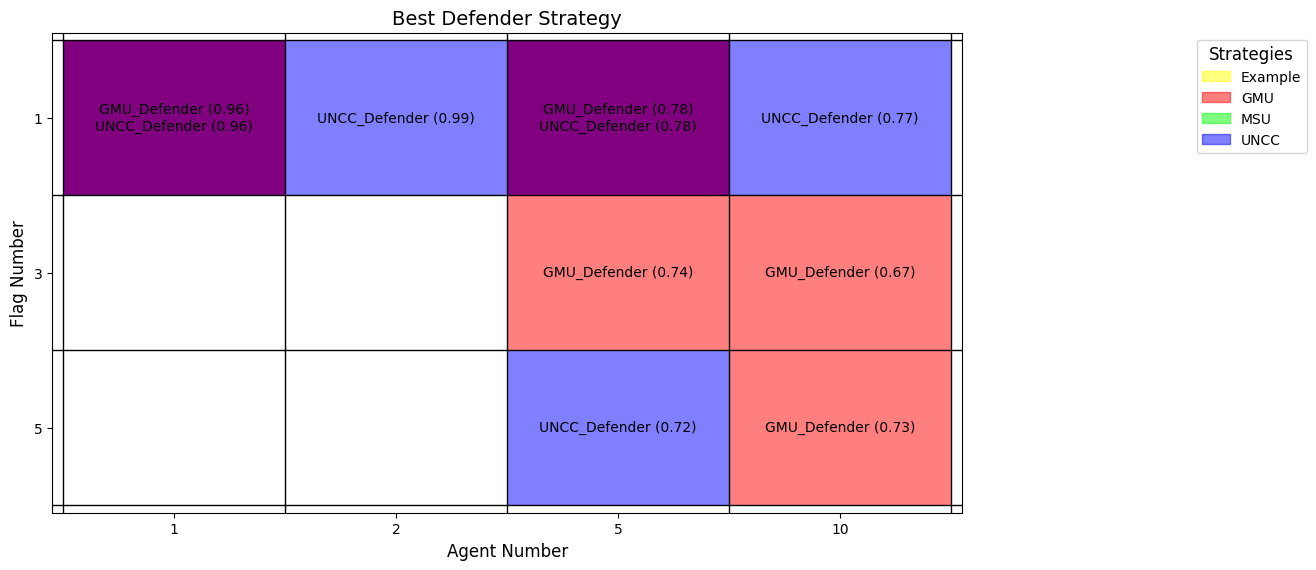

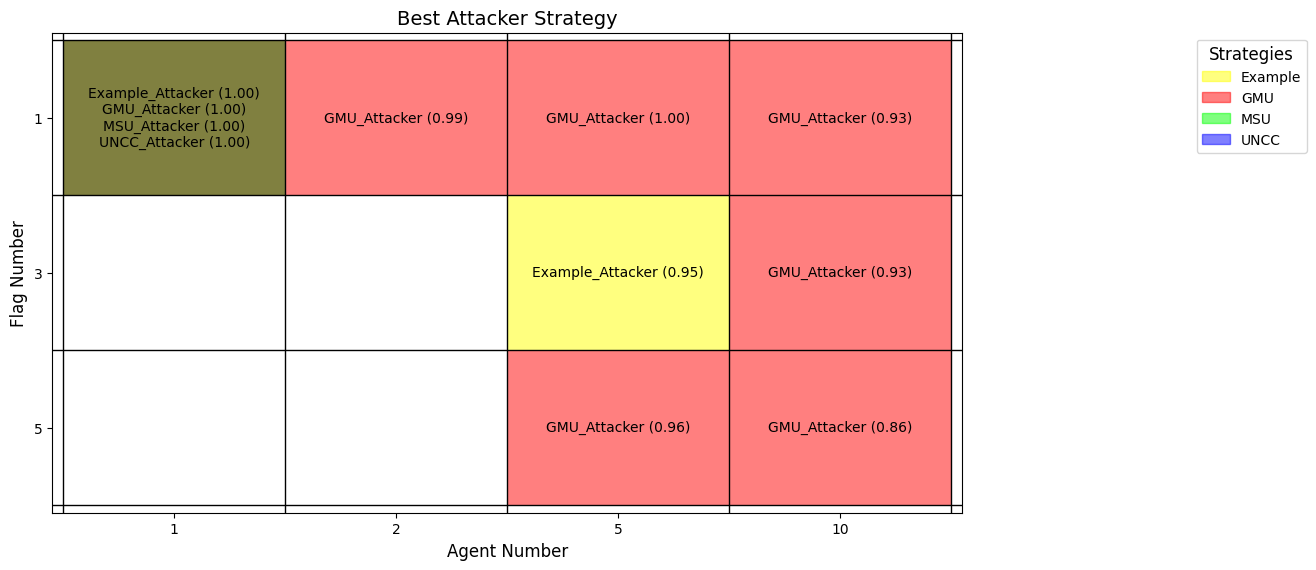

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import nashpy as nash  # This is the import you're looking for
import lib.time_logger as TLOG
from lib.core import *
from collections import defaultdict

def mix_colors(color_list):
    """Average the RGB channels; boost alpha for visibility."""
    if not color_list:
        return (1, 1, 1, 0)
    r = np.mean([c[0] for c in color_list])
    g = np.mean([c[1] for c in color_list])
    b = np.mean([c[2] for c in color_list])
    # Boost alpha for better visibility but cap at 1.0
    a = min(1.0, sum(c[3] for c in color_list))
    return (r, g, b, a)

def get_strategy_base_name(strategy):
    """Extract base strategy name before any underscore."""
    if "_" in strategy:
        return strategy.split("_")[0]
    return strategy

def plot_policy_info_grid(policy_info, role, color_dict, organized_results, pure_nash_info=None, save_path=None):
    """
    Create a grid plot where x-axis is agent number and y-axis is flag number.
    For each cell (configuration), display the best strategy(ies) with their equilibrium probability.
    """
    # Get unique agent and flag numbers from organized_results keys
    agent_nums = sorted(set(k[0] for k in organized_results.keys()))
    flag_nums = sorted(set(k[1] for k in organized_results.keys()))

    # Handle empty cases
    if not agent_nums or not flag_nums:
        print(f"No data to plot for {role}")
        return None

    # Create figure (making cells wider if needed)
    fig, ax = plt.subplots(figsize=(max(6, len(agent_nums) * 3.5), max(4, len(flag_nums) * 2)))
    ax.set_xlim(-0.05, len(agent_nums) + 0.05)
    ax.set_ylim(-0.05, len(flag_nums) + 0.05)
    ax.invert_yaxis()  # so flag numbers increase upwards

    # Set tick labels
    ax.set_xticks(np.arange(len(agent_nums)) + 0.5)
    ax.set_xticklabels(agent_nums)
    ax.set_yticks(np.arange(len(flag_nums)) + 0.5)
    ax.set_yticklabels(flag_nums)

    # Draw grid lines
    for i in range(len(agent_nums) + 1):
        ax.axvline(i, color="black", linewidth=1)
    for j in range(len(flag_nums) + 1):
        ax.axhline(j, color="black", linewidth=1)

    # Always sort the color_dict keys so the legend is in a consistent order.
    sorted_strategy_names = sorted(color_dict.keys())
    legend_handles = []
    for strategy_name in sorted_strategy_names:
        handle = plt.Rectangle((0, 0), 1, 1, color=color_dict[strategy_name])
        legend_handles.append(handle)

    # Fill in each cell
    for i, flag in enumerate(flag_nums):
        for j, agent in enumerate(agent_nums):
            key = (agent, flag)
            # Skip invalid configurations where flag_num > agent_num
            if flag > agent:
                continue

            if key in policy_info:
                info = policy_info[key]  # best strategy info for that configuration
                if info:
                    # Compute the maximum score
                    max_score = max(info.values())
                    # Get all strategies with the highest score, then sort alphabetically for consistency.
                    best_strats = sorted(
                        [(s.replace('.json', ''), p) for s, p in info.items() if np.isclose(p, max_score)],
                        key=lambda x: x[0]
                    )
                    annot_lines = [f"{strat} ({prob:.2f})" for strat, prob in best_strats]
                    annot_text = "\n".join(annot_lines)
                    # Get colors for each strategy's base name
                    cell_colors = []
                    for strat, _ in best_strats:
                        base_name = get_strategy_base_name(strat)
                        color = color_dict.get(base_name, (0.9, 0.9, 0.9, 0.3))
                        cell_colors.append(color)
                    bg_color = mix_colors(cell_colors)
                else:
                    annot_text = "None"
                    bg_color = (1, 1, 1, 0)
            else:
                annot_text = "N/A"
                bg_color = (1, 1, 1, 0)

            # Draw background rectangle and text for the cell
            rect = Rectangle((j, i), 1, 1, facecolor=bg_color, edgecolor="none")
            ax.add_patch(rect)
            ax.text(j + 0.5, i + 0.5, annot_text, ha="center", va="center", fontsize=10, wrap=True, linespacing=1.2)

    # Set labels and title
    ax.set_xlabel("Agent Number", fontsize=12)
    ax.set_ylabel("Flag Number", fontsize=12)
    ax.set_title(f"Best {role.capitalize()} Strategy", fontsize=14)
    ax.legend(legend_handles, sorted_strategy_names, title="Strategies", loc="upper left", bbox_to_anchor=(1.25, 1.0), fontsize=10, title_fontsize=12)

    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)
    # Save figure
    if save_path:
        save_dir = os.path.dirname(save_path)
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    else:
        plt.savefig(f"{role}_best_policy_info_grid.png", dpi=300, bbox_inches="tight")

    return fig

def create_nash_phase_diagrams(setup_scores):
    """Create Nash equilibrium phase diagrams for best strategies by agent/flag combinations."""
    # Define colors for strategies (both roles will use the same ordering by base name)
    COLORS = {"Example": (1, 1, 0, 0.5), "GMU": (1, 0, 0, 0.5), "UNCC": (0, 0, 1, 0.5), "MSU": (0, 1, 0, 0.5)}
    # For defender, we can reverse roles if needed or simply use the same colors dictionary.
    DEFENDER_COLORS = COLORS.copy()
    ATTACKER_COLORS = COLORS.copy()

    # Organize data by agent/flag combinations and compute best scores
    organized_results = {}
    pure_nash_info = {}
    best_defender_info = {}
    best_attacker_info = {}

    for setup_key, data in setup_scores.items():
        setup = json.loads(setup_key)
        agent_num = setup.get("attacker_num")
        flag_num = setup.get("flag_num")
        if agent_num is None or flag_num is None:
            continue
        # Ensure numbers are integers
        agent_num = int(agent_num)
        flag_num = int(flag_num)
        if agent_num < flag_num:
            continue

        key = (agent_num, flag_num)

        if data["matrix_count"] > 0:
            norm_factor = data["matrix_count"]
            # Normalize and filter scores below threshold (0.01)
            def_scores = {k: v / norm_factor for k, v in data["defender_scores"].items() if v / norm_factor > 0.01}
            att_scores = {k: v / norm_factor for k, v in data["attacker_scores"].items() if v / norm_factor > 0.01}
            best_defender_info[key] = def_scores
            best_attacker_info[key] = att_scores
            # Simple heuristic: pure if any strategy score is nearly 1.0
            pure_def = any(score > 0.95 for score in def_scores.values())
            pure_att = any(score > 0.95 for score in att_scores.values())
            pure_nash_info[key] = pure_def and pure_att
            organized_results[key] = [{"payoff_matrix": None}]  # Dummy matrix for grid positioning

    # Create save directory for diagrams
    save_dir = "data/nash_diagrams"
    os.makedirs(save_dir, exist_ok=True)
    def_path = os.path.join(save_dir, "defender_phase_diagram.png")
    att_path = os.path.join(save_dir, "attacker_phase_diagram.png")

    # Plot phase diagrams using our grid plotting function
    plot_policy_info_grid(best_defender_info, "defender", DEFENDER_COLORS, organized_results, pure_nash_info, def_path)
    plot_policy_info_grid(best_attacker_info, "attacker", ATTACKER_COLORS, organized_results, pure_nash_info, att_path)

    console.print(f"[success]Phase diagrams saved to {save_dir}[/success]")
    return best_defender_info, best_attacker_info, pure_nash_info

def create_performance_plots(setup_scores):
    """Create performance plots for strategies across agent and flag numbers."""
    agent_nums = set()
    flag_nums = set()

    for setup_key in setup_scores:
        setup = json.loads(setup_key)
        if "attacker_num" in setup and "flag_num" in setup:
            agent_nums.add(int(setup["attacker_num"]))
            flag_nums.add(int(setup["flag_num"]))

    agent_nums = sorted(agent_nums)
    flag_nums = sorted(flag_nums)

    plots_dir = "data/strategy_plots"
    os.makedirs(plots_dir, exist_ok=True)

    # Fixed agent plots (varying flag number)
    for agent_num in agent_nums:
        att_data = defaultdict(list)
        def_data = defaultdict(list)
        for setup_key, data in setup_scores.items():
            setup = json.loads(setup_key)
            if int(setup.get("attacker_num", 0)) != agent_num:
                continue
            flag_num = int(setup.get("flag_num", 0))
            if flag_num is None:
                continue
            norm = data["matrix_count"] if data["matrix_count"] > 0 else 1
            for strat, score in data["attacker_scores"].items():
                att_data[strat].append((flag_num, score / norm))
            for strat, score in data["defender_scores"].items():
                def_data[strat].append((flag_num, score / norm))

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        for strat, points in att_data.items():
            if points:
                xs, ys = zip(*sorted(points))
                plt.plot(xs, ys, "o-", label=strat, alpha = 0.7)
        plt.title(f"Attacker Performance (Agent Num={agent_num})")
        plt.xlabel("Flag Number")
        plt.ylabel("Average Score")
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        for strat, points in def_data.items():
            if points:
                xs, ys = zip(*sorted(points))
                plt.plot(xs, ys, "o-", label=strat, alpha = 0.7)
        plt.title(f"Defender Performance (Agent Num={agent_num})")
        plt.xlabel("Flag Number")
        plt.ylabel("Average Score")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f"perf_agent{agent_num}.png"), dpi=300)
        plt.close()

    # Fixed flag plots (varying agent number)
    for flag_num in flag_nums:
        att_data = defaultdict(list)
        def_data = defaultdict(list)
        for setup_key, data in setup_scores.items():
            setup = json.loads(setup_key)
            if int(setup.get("flag_num", 0)) != flag_num:
                continue
            agent_num = int(setup.get("attacker_num", 0))
            if agent_num is None:
                continue
            norm = data["matrix_count"] if data["matrix_count"] > 0 else 1
            for strat, score in data["attacker_scores"].items():
                att_data[strat].append((agent_num, score / norm))
            for strat, score in data["defender_scores"].items():
                def_data[strat].append((agent_num, score / norm))

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        for strat, points in att_data.items():
            if points:
                xs, ys = zip(*sorted(points))
                plt.plot(xs, ys, "o-", label=strat, alpha = 0.7)
        plt.title(f"Attacker Performance (Flag Num={flag_num})")
        plt.xlabel("Agent Number")
        plt.ylabel("Average Score")
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        for strat, points in def_data.items():
            if points:
                xs, ys = zip(*sorted(points))
                plt.plot(xs, ys, "o-", label=strat, alpha = 0.7)
        plt.title(f"Defender Performance (Flag Num={flag_num})")
        plt.xlabel("Agent Number")
        plt.ylabel("Average Score")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f"perf_flag{flag_num}.png"), dpi=300)
        plt.close()

    console.print(f"[success]Performance plots saved to {plots_dir}[/success]")

# Run the visualizations using setup_scores from above
best_defender_info, best_attacker_info, pure_nash_info = create_nash_phase_diagrams(setup_scores)
create_performance_plots(setup_scores)


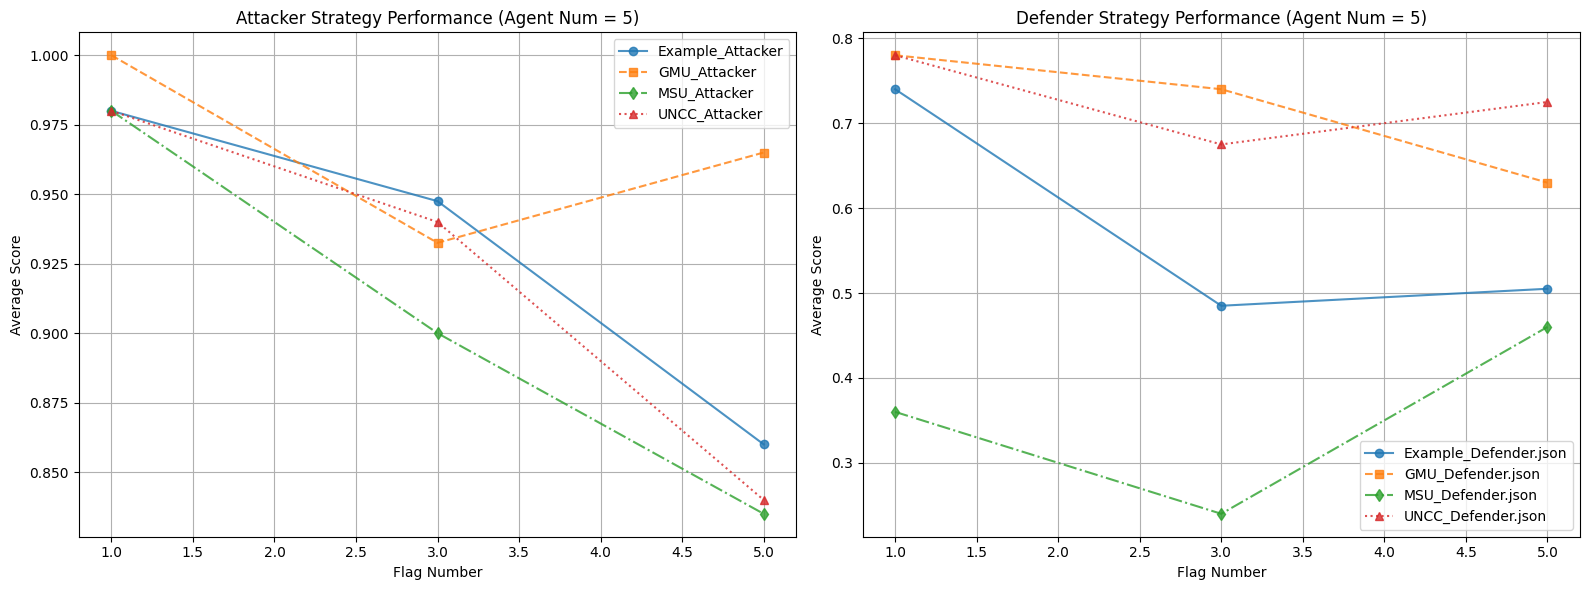

Plot saved as performance_by_flag_agent5.png


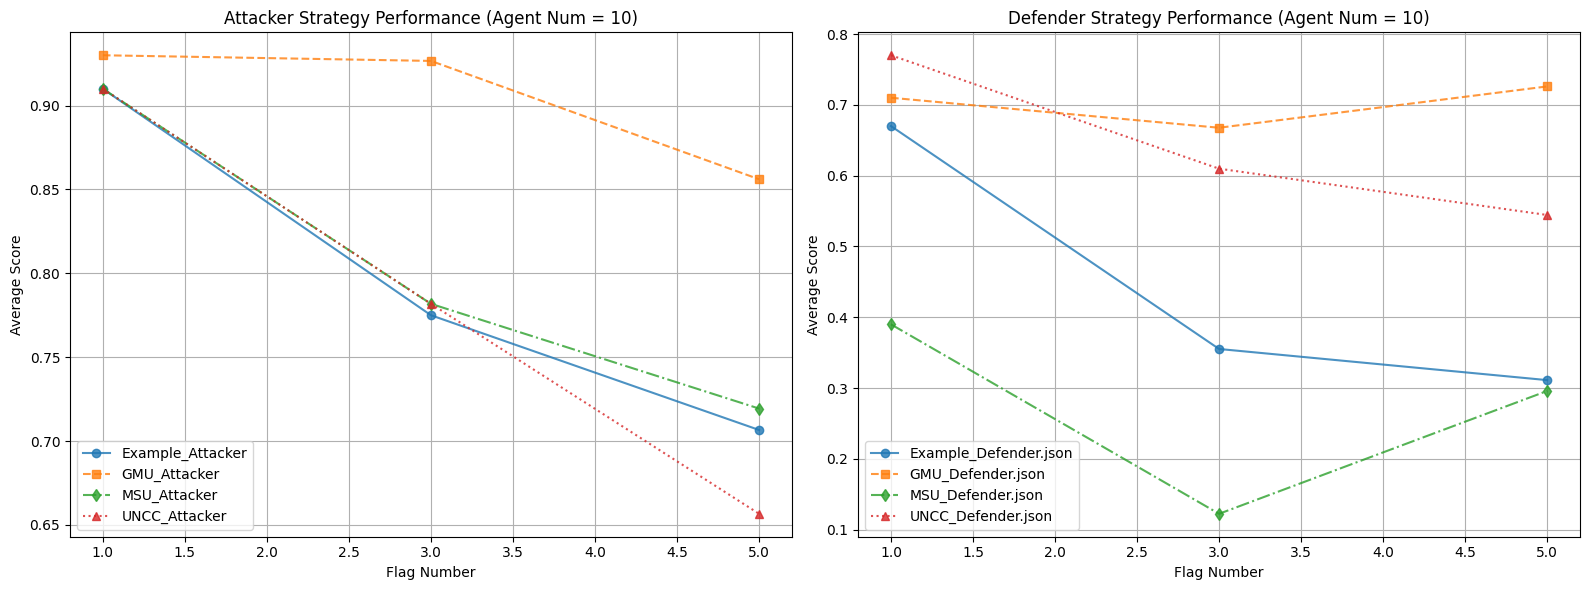

Plot saved as performance_by_flag_agent10.png


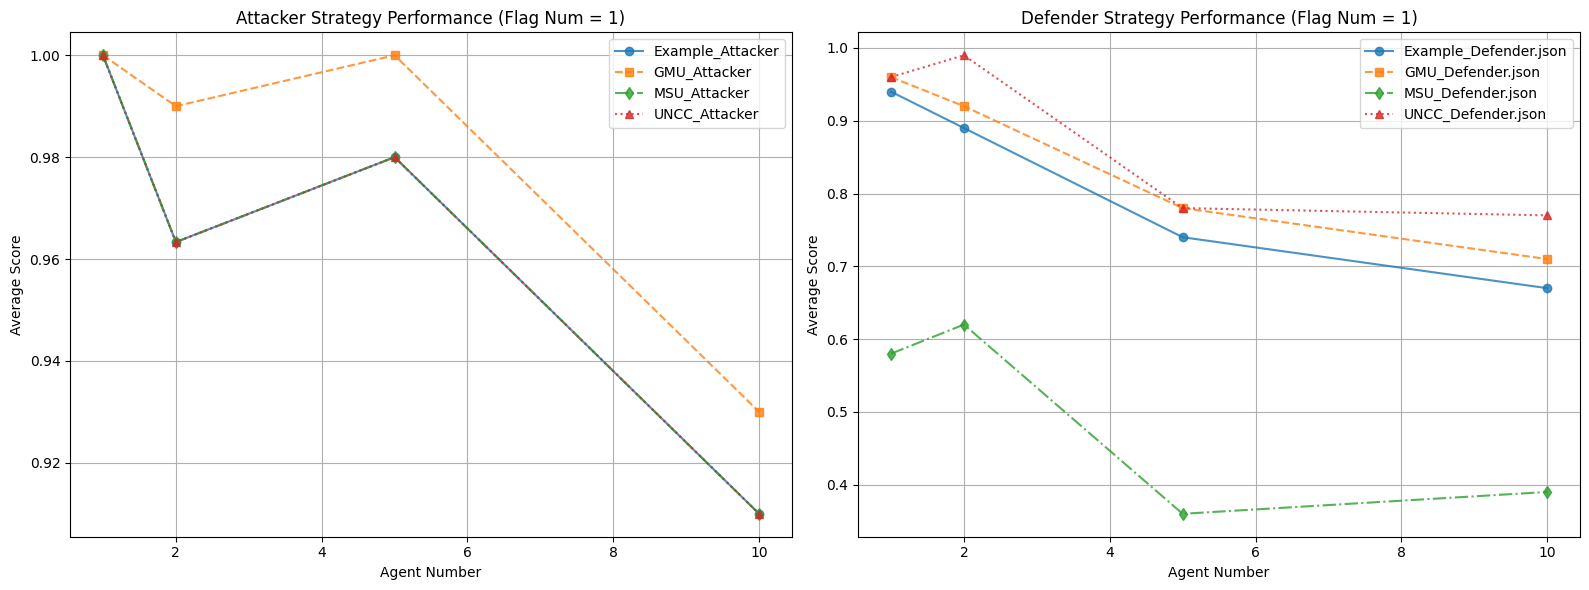

Plot saved as performance_by_agent_flag1.png


In [60]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

def performance_by_flag(setup_scores, fixed_agent, all_attackers, all_defenders):
    """Plot strategy performance for fixed agent number across different flag numbers.
       Only strategy lines with at least 3 data points are plotted.
       Different line styles and markers are used per strategy."""
    # Containers for flag numbers and scores per strategy
    flag_nums = []
    attacker_data = {strat: [] for strat in sorted(all_attackers)}
    defender_data = {strat: [] for strat in sorted(all_defenders)}
    
    # Loop through all setups to collect data
    for setup_key, data in setup_scores.items():
        setup = json.loads(setup_key)
        agent_num = setup.get("attacker_num")
        flag_num = setup.get("flag_num")
        
        # Only process data for the fixed agent and valid flag numbers
        if agent_num is None or flag_num is None or int(agent_num) != fixed_agent:
            continue
        
        flag_num = int(flag_num)
        flag_nums.append(flag_num)
        
        # Normalize scores by matrix count
        norm_factor = data.get("matrix_count", 1) if data.get("matrix_count", 0) > 0 else 1
        
        for strat in attacker_data.keys():
            score = data.get("attacker_scores", {}).get(strat, 0) / norm_factor
            attacker_data[strat].append((flag_num, score))
        for strat in defender_data.keys():
            score = data.get("defender_scores", {}).get(strat, 0) / norm_factor
            defender_data[strat].append((flag_num, score))
    
    if not flag_nums:
        print(f"No data found for fixed agent {fixed_agent}")
        return
    
    # Define a set of line styles and markers
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', 'd', '^', 'v', 'p', '*']
    
    # Create the plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot attacker performance using different line styles and markers
    for idx, (strat, points) in enumerate(attacker_data.items()):
        if len(points) >= 3:
            xs, ys = zip(*sorted(points))
            style = line_styles[idx % len(line_styles)]
            marker = markers[idx % len(markers)]
            ax1.plot(xs, ys, linestyle=style, marker=marker, alpha=0.8, label=strat)
    ax1.set_xlabel('Flag Number')
    ax1.set_ylabel('Average Score')
    ax1.set_title(f'Attacker Strategy Performance (Agent Num = {fixed_agent})')
    ax1.grid(True)
    ax1.legend()
    
    # Plot defender performance using different line styles and markers
    for idx, (strat, points) in enumerate(defender_data.items()):
        if len(points) >= 3:
            xs, ys = zip(*sorted(points))
            style = line_styles[idx % len(line_styles)]
            marker = markers[idx % len(markers)]
            ax2.plot(xs, ys, linestyle=style, marker=marker, alpha=0.8, label=strat)
    ax2.set_xlabel('Flag Number')
    ax2.set_ylabel('Average Score')
    ax2.set_title(f'Defender Strategy Performance (Agent Num = {fixed_agent})')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    save_path = f"performance_by_flag_agent{fixed_agent}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"Plot saved as {save_path}")

def performance_by_agent(setup_scores, fixed_flag, all_attackers, all_defenders):
    """Plot strategy performance for fixed flag number across different agent numbers.
       Only strategy lines with at least 3 data points are plotted.
       Different line styles and markers are used per strategy."""
    agent_nums = []
    attacker_data = {strat: [] for strat in sorted(all_attackers)}
    defender_data = {strat: [] for strat in sorted(all_defenders)}
    
    # Loop through all setups to collect data
    for setup_key, data in setup_scores.items():
        setup = json.loads(setup_key)
        agent_num = setup.get("attacker_num")
        flag_num = setup.get("flag_num")
        
        if flag_num is None or int(flag_num) != fixed_flag or agent_num is None:
            continue
        
        agent_num = int(agent_num)
        agent_nums.append(agent_num)
        
        norm_factor = data.get("matrix_count", 1) if data.get("matrix_count", 0) > 0 else 1
        
        for strat in attacker_data.keys():
            score = data.get("attacker_scores", {}).get(strat, 0) / norm_factor
            attacker_data[strat].append((agent_num, score))
        for strat in defender_data.keys():
            score = data.get("defender_scores", {}).get(strat, 0) / norm_factor
            defender_data[strat].append((agent_num, score))
    
    if not agent_nums:
        print(f"No data found for fixed flag {fixed_flag}")
        return
    
    # Define line styles and markers
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', 'd', '^', 'v', 'p', '*']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot attacker performance using different styles
    for idx, (strat, points) in enumerate(attacker_data.items()):
        if len(points) >= 3:
            xs, ys = zip(*sorted(points))
            style = line_styles[idx % len(line_styles)]
            marker = markers[idx % len(markers)]
            ax1.plot(xs, ys, linestyle=style, marker=marker, alpha=0.8, label=strat)
    ax1.set_xlabel('Agent Number')
    ax1.set_ylabel('Average Score')
    ax1.set_title(f'Attacker Strategy Performance (Flag Num = {fixed_flag})')
    ax1.grid(True)
    ax1.legend()
    
    # Plot defender performance using different styles
    for idx, (strat, points) in enumerate(defender_data.items()):
        if len(points) >= 3:
            xs, ys = zip(*sorted(points))
            style = line_styles[idx % len(line_styles)]
            marker = markers[idx % len(markers)]
            ax2.plot(xs, ys, linestyle=style, marker=marker, alpha=0.8, label=strat)
    ax2.set_xlabel('Agent Number')
    ax2.set_ylabel('Average Score')
    ax2.set_title(f'Defender Strategy Performance (Flag Num = {fixed_flag})')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    save_path = f"performance_by_agent_flag{fixed_flag}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"Plot saved as {save_path}")

# -------------------------------------------
# Continue using your existing variables from earlier

# Dynamically build the complete sets of strategy names from setup_scores:
all_attackers = set()
all_defenders = set()
for data in setup_scores.values():
    all_attackers.update(data.get("attacker_scores", {}).keys())
    all_defenders.update(data.get("defender_scores", {}).keys())

# Now, generate performance plots.
# For a fixed agent number (for example, agent 5):
performance_by_flag(setup_scores, fixed_agent=5, all_attackers=all_attackers, all_defenders=all_defenders)
performance_by_flag(setup_scores, fixed_agent=10, all_attackers=all_attackers, all_defenders=all_defenders)

# For a fixed flag number (for example, flag 3):
performance_by_agent(setup_scores, fixed_flag=1, all_attackers=all_attackers, all_defenders=all_defenders)
